In [1]:
%matplotlib inline

In [2]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import psfModels as pM
import fit_psf as fp
import numpy as np

## Utility functions 

In [162]:
def plot_2D_color_psf(array, log_scale=True, plot_title=''):
    
    fig, ax = plt.subplots()
    
    size_arr_arcsec = len(array)*pxscale/2

    if log_scale:
        img = ax.imshow(array, norm=LogNorm(vmin=10**-5, vmax=1), origin='lower',
                    extent=(-size_arr_arcsec, size_arr_arcsec, -size_arr_arcsec, size_arr_arcsec), vmin=10**-2)
    else:
        img = ax.imshow(array, origin='lower',
                    extent=(-size_arr_arcsec, size_arr_arcsec, -size_arr_arcsec, size_arr_arcsec), vmin=10**-2)
    ax.set_title(plot_title)
    #ax.set_ylim(-5,5)
    #ax.set_xlim(-5,5)
    fig.colorbar(img)

In [5]:
def plot_semipsf_diff_expo(function, lbda, pxscale, r0):
    """
    Plot kolmogorov psf for several index. 
    Arguments for function are 'Kolmogorov_FFT_interpolation', 'Kolmogorov_Hankel' or 'Kolmogorov_Hankel_interpolation'.
    """
    
    me_x_axis = np.linspace(0,5)
    index = [4/3, 3/2, 5/3, 11/6]
    
    fig, ax = plt.subplots()
    
    for i in index:
        if function == 'Kolmogorov_FFT_interpolation':
            test_psf = pM.psf_Kolmogorov_FFT_interp(me_x_axis.max()+1, lbda, pxscale, r0=r0, expo=i)(me_x_axis) 
        if function == 'Kolmogorov_Hankel':
            test_psf = pM.psf_Kolmogorov_Hankel(me_x_axis, lbda, r0=r0, expo=i)
        if function == 'Kolmogorov_Hankel_interpolation':
            test_psf = pM.psf_Kolmogorov_Hankel_interp(me_x_axis.max()+1, lbda, r0=r0, npts=50, expo=i)(me_x_axis)
            
        ax.plot(me_x_axis, test_psf, label='n = {:.3f}'.format(i))
        
    ax.set_ylim(10**-4)
    ax.set_xlim(0,5)
    
    ax.set_yscale('log')
    ax.set_ylabel('Normalised flux')
    ax.set_xlabel('r [arcsec]')
    
    ax.set_title(function)    
    ax.legend()

## Make array of r

In [6]:
seeing = 1.0                                               # [arcsec]


pxscale = 0.401                                            # [arcsec/pix]       (i.e. résolution)
lbda = 5000e-10                                            # [m]
r0 = 0.10 #0.98 * lbda/seeing * (180/np.pi) * 3600           # [m]

size_array = 100                                            # [pixels]           (i.e. size of map)

shape = (size_array,size_array)                                            # [] size of the grid

x, y = fp.create_coords(shape, starts='auto', steps=pxscale, sparse=True)
radius = np.hypot(x, y)

#size_arr_arcsec = size_array*pxscale/2


#plot_2D_color_psf(radius, log_scale=False, plot_title='Radius map in arcsec')

CAREFUL

Table has values in arcsec

Indexes of table or not in arcsec

## Interpolation FFT

psf_fft_inter = pM.psf_Kolmogorov_FFT_interp(radius.max(), lbda, pxscale, r0=r0, expo=expo)(radius) 

#plot_2D_color_psf(psf_fft_inter, plot_title='FFT with interpolation')
#plt.savefig('psf_meself_kolmo')
#plot_semipsf_diff_expo('Kolmogorov_FFT_interpolation', lbda, pxscale, r0)

## Hankel

psf_Hank = pM.psf_Kolmogorov_Hankel(radius, lbda, r0=r0)

#plot_2D_color_psf(psf_Hank, plot_title='Hankel transform')
#plot_semipsf_diff_expo('Kolmogorov_Hankel', lbda, pxscale, r0)

## Interpolation Hankel

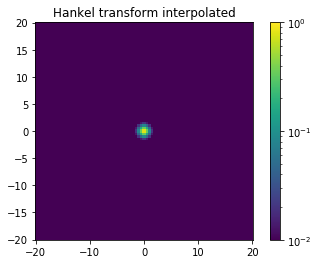

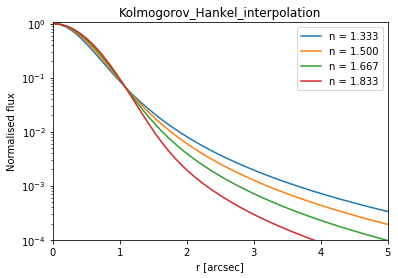

In [155]:
psf_Hank_inter = pM.psf_Kolmogorov_Hankel_interp(radius.max(), lbda, r0=r0, npts=50)(radius)

plot_2D_color_psf(psf_Hank_inter, plot_title='Hankel transform interpolated')
plot_semipsf_diff_expo('Kolmogorov_Hankel_interpolation', lbda, pxscale, r0)

## Cube of PSF

In [145]:
lambdas = np.linspace(4000,5000,101)

In [156]:
# PSF corresponding to the wavelength lambdas[i] is psf_cube[i,:,:]

psf_cube = np.zeros(shape=(len(lambdas),psf_Hank_inter.shape[0],psf_Hank_inter.shape[1]))
i=0
for lbdas_value in lambdas:
    psf_cube[i,:,:] = pM.psf_Kolmogorov_Hankel(radius, lbda, r0=r0)
    #psf_cube[i,:,:] = pM.psf_Kolmogorov_Hankel_interp(radius.max(), lbdas_value, r0=r0, npts=50)(radius)
    i+=1

## Plot a slice of the PSF cube

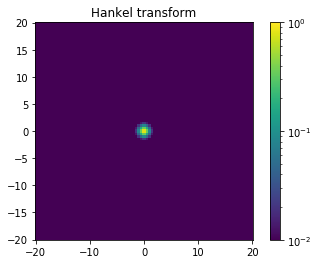

In [201]:
plot_2D_color_psf(psf_cube[100,:,:], plot_title='Hankel transform')  